In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [52]:
x = symbols('x')

In [53]:
f = 2.5 * cos(2 * x) + exp(x / 3 + 0.01)

In [54]:
a = -1
b = 3

In [55]:
n = 33

In [56]:
X = [0] * n
Y = [0] * n
for k in range(1, n + 1):
    X[k - 1] = N(a + (b - a) / (n - 1) * (k - 1))
    Y[k - 1] = N(f.subs(x, X[k - 1]))

In [57]:
X = np.transpose(np.array(X))
Y = np.transpose(np.array(Y))
np.transpose(np.column_stack((X, Y))).shape

(2, 33)

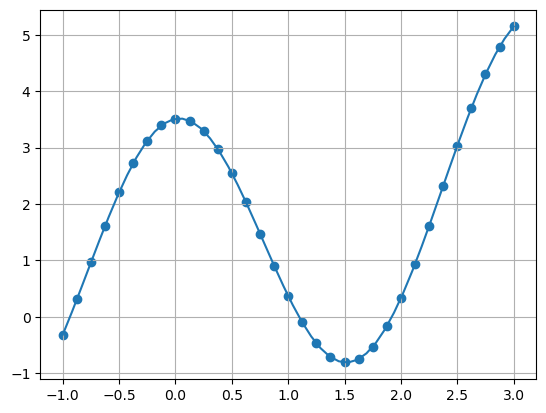

In [58]:
p_f = lambdify(x, f, modules = 'numpy')
x_vals = np.linspace(a, b)
plt.plot(x_vals, p_f(x_vals))
plt.scatter(X, Y)
plt.grid(True)
plt.show()

In [59]:
S = np.zeros((n, n))
c = np.zeros((n, 1))

In [60]:
h = [0] * (n - 1)
for k in range(n - 1):
    h[k] = X[k + 1] - X[k]

In [61]:
for i in range(1, n - 1):
    S[i][i - 1] = h[i - 1]
    S[i][i] = 2 * (h[i - 1] + h[i])
    S[i][i + 1] = h[i]
    c[i] = (Y[i + 1] - Y[i]) / h[i] - (Y[i] - Y[i - 1]) / h[i - 1]

In [62]:
S[0][0] = 6
S[0][1] = -6
S[n - 1][n - 2] = -6
S[n - 1][n - 1] = 6
c[0][0] = 0
c[n - 1][0] = 0
sigma = np.dot(np.linalg.inv(S), c)

In [63]:
def p(k):
    return (x - X[k]) / h[k] * Y[k + 1] + (X[k + 1] - x) / h[k] * Y[k] + (h[k] ** 2) *((((x - X[k]) / h[k]) ** 3 - (x - X[k]) / h[k]) * sigma[k + 1][0] + (((X[k + 1] - x) / h[k]) ** 3 - (X[k + 1] - x) / h[k]) * sigma[k][0])

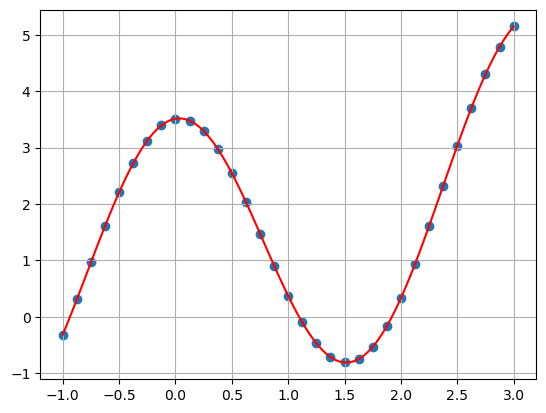

In [64]:
for k in range(1, n):
    p_spline = lambdify(x, p(k - 1), modules = ['numpy'])
    x_s = np.linspace(float(X[k - 1]), float(X[k]))
    plt.plot(x_s, p_spline(x_s), 'r')
plt.scatter(X, Y)
plt.grid(True)
plt.show()

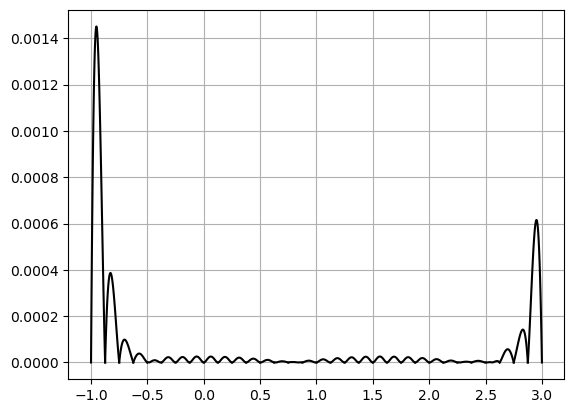

In [65]:
for k in range(1, n):
    p_spline = lambdify(x, abs(f - p(k - 1)), modules = ['numpy'])
    x_s = np.linspace(float(X[k - 1]), float(X[k]))
    plt.plot(x_s, p_spline(x_s), 'black')
plt.grid(True)
plt.show()

Abs(0.0124697551491873*exp(x/3) + 40.0*cos(2*x))


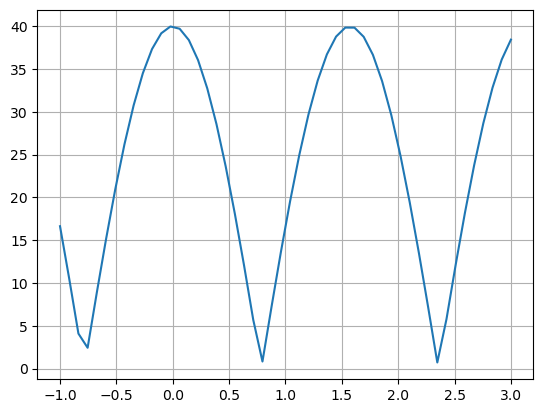

In [76]:
p_diff = lambdify(x, Abs(diff(f, (x, 4))), modules = ['numpy'])
print(Abs(diff(f, (x, 4))))
plt.plot(x_vals, p_diff(x_vals))
plt.grid(True)
plt.show()

In [67]:
M = max(p_diff(x_vals))
M

39.9790703900493